In [9]:
## For data handling
from datetime import datetime
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid") 


In [16]:
#99709 is the ZIP code for Fairbanks, Alaska
alaska = pd.read_csv("99709.csv", parse_dates=['date_time'])


# This will tell us about the df
print("There are",len(alaska),"observations in df.")
print("The columns are",list(alaska.columns))

# Look at 5 randomly sampled rows
alaska.sample(5)

There are 36536 observations in df.
The columns are ['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location']


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
7504,2011-01-25 00:00:00,-12,-19,0.0,3.7,1,55,02:39 AM,10:47 AM,11:00 AM,...,18,47,100,0.0,996,-19,0,9,9,99709
7652,2011-02-12 12:00:00,-28,-36,0.0,4.9,1,64,10:19 AM,07:24 AM,10:01 AM,...,8,77,99,0.0,1003,-28,0,9,5,99709
34822,2020-05-31 18:00:00,21,13,0.0,-3.3,5,58,03:17 PM,04:02 AM,03:34 AM,...,17,46,39,0.0,999,19,10,80,13,99709
34992,2020-06-22 00:00:00,13,7,0.0,-2.1,3,7,04:17 AM,01:37 AM,02:58 AM,...,3,48,91,0.1,1009,7,3,231,2,99709
3215,2009-08-06 21:00:00,22,13,0.0,16.7,5,100,10:13 PM,06:20 AM,05:09 AM,...,8,52,79,0.0,1011,16,10,264,4,99709


In [17]:
alaska_train = alaska.loc[alaska.date_time < datetime(2018,1,1),].copy()
alaska_test = alaska.drop(alaska_train.index).copy()

In [20]:
alaska_train.head(10)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-07-01 00:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,13,90,98,1.0,1017,9,9,248,8,99709
1,2008-07-01 03:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,12,100,97,1.4,1017,9,9,231,8,99709
2,2008-07-01 06:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,16,84,94,0.5,1016,9,2,237,10,99709
3,2008-07-01 09:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,15,100,88,1.2,1015,10,9,239,11,99709
4,2008-07-01 12:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,16,94,89,0.3,1015,9,2,241,12,99709
5,2008-07-01 15:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,8,64,76,0.5,1015,12,5,253,7,99709
6,2008-07-01 18:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,12,74,72,1.0,1014,15,10,260,9,99709
7,2008-07-01 21:00:00,15,9,0.0,-2.7,3,4,12:00 AM,12:00 AM,03:12 AM,...,7,27,76,1.0,1014,15,9,264,4,99709
8,2008-07-02 00:00:00,23,7,0.0,-2.8,4,0,12:00 AM,12:00 AM,03:15 AM,...,13,21,93,0.2,1015,9,9,231,6,99709
9,2008-07-02 03:00:00,23,7,0.0,-2.8,4,0,12:00 AM,12:00 AM,03:15 AM,...,17,11,91,0.0,1016,7,10,216,8,99709


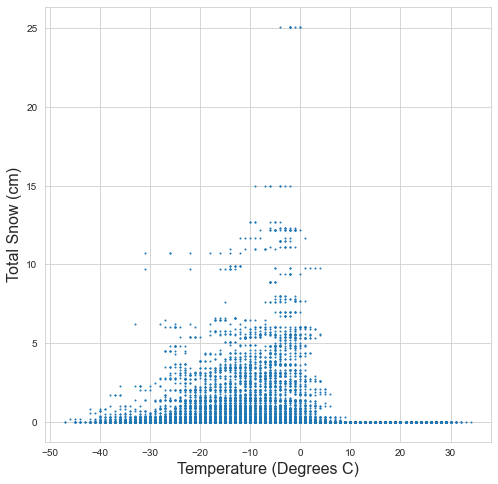

In [23]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(alaska_train.tempC, alaska_train.totalSnow_cm, s=1)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Temperature (Degrees C)", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()

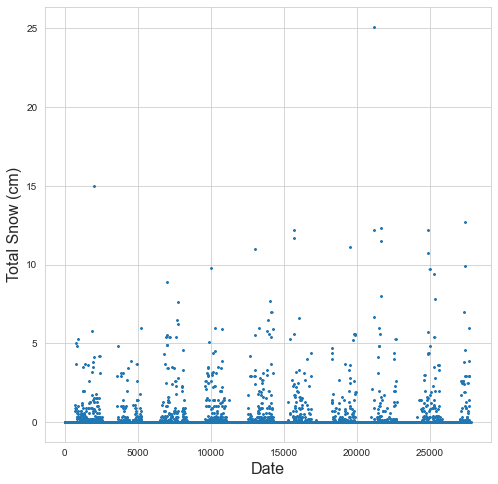

In [24]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(alaska_train.index.values, alaska_train.totalSnow_cm, s=1)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Date", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [29]:
ses = SimpleExpSmoothing(alaska_train.totalSnow_cm.values)

In [30]:
fit = ses.fit(smoothing_level=0.5, optimized=False)

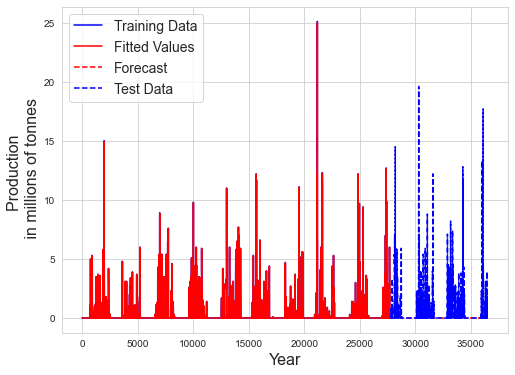

In [31]:
# and the forecast on the test data
plt.figure(figsize=(8,6))

# plot the training data
plt.plot(alaska_train.index.values, alaska_train.totalSnow_cm,'b',
            label = "Training Data")

# plot the fit
plt.plot(alaska_train.index.values, fit.fittedvalues,'r-',
            label = "Fitted Values")

# plot the forecast
plt.plot(alaska_test.index.values, fit.forecast(len(alaska_test)),'r--',
            label = "Forecast")

plt.plot(alaska_test.index.values, alaska_test.totalSnow_cm,'b--',
            label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Year", fontsize=16)
plt.ylabel("Production \n in millions of tonnes", fontsize=16)

plt.show()